In [0]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

from fbprophet import Prophet

In [0]:
df = pd.read_csv('Data\Bike_Sharing_Demand.csv',parse_dates = True)

In [118]:
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:
df['datetime'] = pd.to_datetime(df['datetime'])


In [124]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [0]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [0]:
df = df.rename(columns={'datetime': 'ds', 'count': 'y'})

In [0]:
validate = df[['ds','y','season','holiday','weather','temp','humidity','windspeed']].tail(48)

In [0]:
df.drop(df[['ds','y','season','holiday','weather','temp','humidity','windspeed']].tail(48).index,inplace=True)

In [0]:
train = df[['ds','y','season','holiday','weather','temp','humidity','windspeed']]

In [130]:
 m = Prophet()
m.add_regressor('season')
m.add_regressor('holiday')
m.add_regressor('weather')
m.add_regressor('temp')
m.add_regressor('humidity')
m.add_regressor('windspeed')

In [132]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

In [0]:
future['season'] = validate['season'].values 
future['holiday'] = validate['holiday'].values 
future['weather'] =  validate['weather'].values
future['temp'] = validate['temp'].values 
future['humidity'] =  validate['humidity'].values
future['windspeed'] = validate['windspeed'].values 

In [0]:
forecast = m.predict(future)

In [136]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,holiday,holiday_lower,holiday_upper,humidity,humidity_lower,humidity_upper,season,season_lower,season_upper,temp,temp_lower,temp_upper,weather,weather_lower,weather_upper,weekly,weekly_lower,weekly_upper,windspeed,windspeed_lower,windspeed_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-18 00:00:00,259.232687,-20.044968,261.681259,259.232687,259.232687,-140.109684,-140.109684,-140.109684,-102.697253,-102.697253,-102.697253,-36.230094,-36.230094,-36.230094,0.0,0.0,0.0,-20.828175,-20.828175,-20.828175,7.372483,7.372483,7.372483,-10.207388,-10.207388,-10.207388,-14.713666,-14.713666,-14.713666,-1.182338,-1.182338,-1.182338,2.146652,2.146652,2.146652,0.0,0.0,0.0,119.123003
1,2012-12-18 01:00:00,259.237289,-28.125667,243.452567,259.237289,259.237289,-155.322029,-155.322029,-155.322029,-118.502611,-118.502611,-118.502611,-36.230094,-36.230094,-36.230094,0.0,0.0,0.0,-20.828175,-20.828175,-20.828175,7.372483,7.372483,7.372483,-10.207388,-10.207388,-10.207388,-14.713666,-14.713666,-14.713666,-0.589324,-0.589324,-0.589324,2.146652,2.146652,2.146652,0.0,0.0,0.0,103.915260
2,2012-12-18 02:00:00,259.241892,-77.575800,194.435609,259.241892,259.241892,-195.954330,-195.954330,-195.954330,-160.175078,-160.175078,-160.175078,-35.733270,-35.733270,-35.733270,0.0,0.0,0.0,-16.938147,-16.938147,-16.938147,7.372483,7.372483,7.372483,-10.207388,-10.207388,-10.207388,-14.713666,-14.713666,-14.713666,-0.045981,-0.045981,-0.045981,-1.246553,-1.246553,-1.246553,0.0,0.0,0.0,63.287562
3,2012-12-18 03:00:00,259.246494,-96.383943,184.187731,259.246494,259.246494,-211.657667,-211.657667,-211.657667,-199.079584,-199.079584,-199.079584,-13.022730,-13.022730,-13.022730,0.0,0.0,0.0,-16.938147,-16.938147,-16.938147,7.372483,7.372483,7.372483,-13.989659,-13.989659,-13.989659,10.646816,10.646816,10.646816,0.444646,0.444646,0.444646,-0.114222,-0.114222,-0.114222,0.0,0.0,0.0,47.588826
4,2012-12-18 04:00:00,259.251096,-77.920226,200.838685,259.251096,259.251096,-202.307227,-202.307227,-202.307227,-195.183241,-195.183241,-195.183241,-8.004157,-8.004157,-8.004157,0.0,0.0,0.0,-13.048118,-13.048118,-13.048118,7.372483,7.372483,7.372483,-13.989659,-13.989659,-13.989659,10.646816,10.646816,10.646816,0.880172,0.880172,0.880172,1.014321,1.014321,1.014321,0.0,0.0,0.0,56.943869
5,2012-12-18 05:00:00,259.255698,-25.930082,252.771389,259.255698,259.255698,-148.117833,-148.117833,-148.117833,-133.391471,-133.391471,-133.391471,-15.985245,-15.985245,-15.985245,0.0,0.0,0.0,-16.289809,-16.289809,-16.289809,7.372483,7.372483,7.372483,-21.554203,-21.554203,-21.554203,10.646816,10.646816,10.646816,1.258883,1.258883,1.258883,3.839468,3.839468,3.839468,0.0,0.0,0.0,111.137866
6,2012-12-18 06:00:00,259.260301,48.455604,337.628976,259.260301,259.260301,-63.466983,-63.466983,-63.466983,-38.564036,-38.564036,-38.564036,-26.482692,-26.482692,-26.482692,0.0,0.0,0.0,-20.179837,-20.179837,-20.179837,7.372483,7.372483,7.372483,-25.336475,-25.336475,-25.336475,10.646816,10.646816,10.646816,1.579745,1.579745,1.579745,1.014321,1.014321,1.014321,0.0,0.0,0.0,195.793318
7,2012-12-18 07:00:00,259.264903,149.431077,424.164912,259.264903,259.264903,19.769351,19.769351,19.769351,43.277314,43.277314,43.277314,-25.350361,-25.350361,-25.350361,0.0,0.0,0.0,-20.179837,-20.179837,-20.179837,7.372483,7.372483,7.372483,-25.336475,-25.336475,-25.336475,10.646816,10.646816,10.646816,1.842397,1.842397,1.842397,2.146652,2.146652,2.146652,0.0,0.0,0.0,279.034254
8,2012-12-18 08:00:00,259.269505,182.237165,464.614341,259.269505,259.269505,64.420752,64.420752,64.420752,79.504010,79.504010,79.504010,-17.130407,-17.130407,-17.130407,0.0,0.0,0.0,-20.828175,-20.828175,-20.828175,7.372483,7.372483,7.372483,-21.554203,-21.554203,-21.554203,10.646816,10.64

In [137]:
timeseries_evaluation_metrics_func(validate.y,forecast.yhat)

MSE is : 10949.633753583237
MAE is : 81.56877974732676
RMSE is : 104.64049767457739
MAPE is : 192.07930523320525
R2 is : 0.6694874241468419



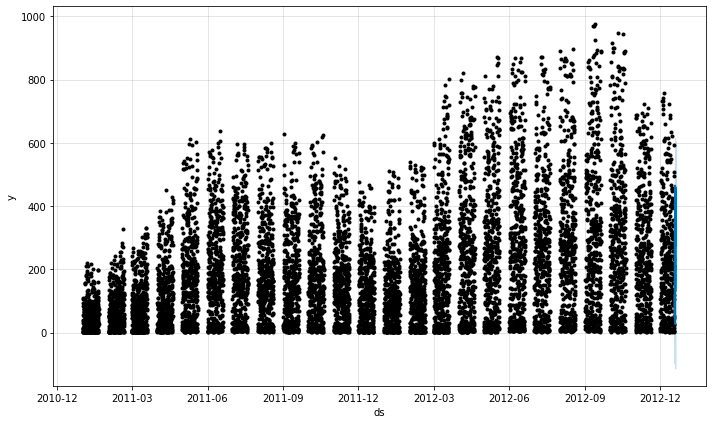

In [138]:
fig1 = m.plot(forecast)

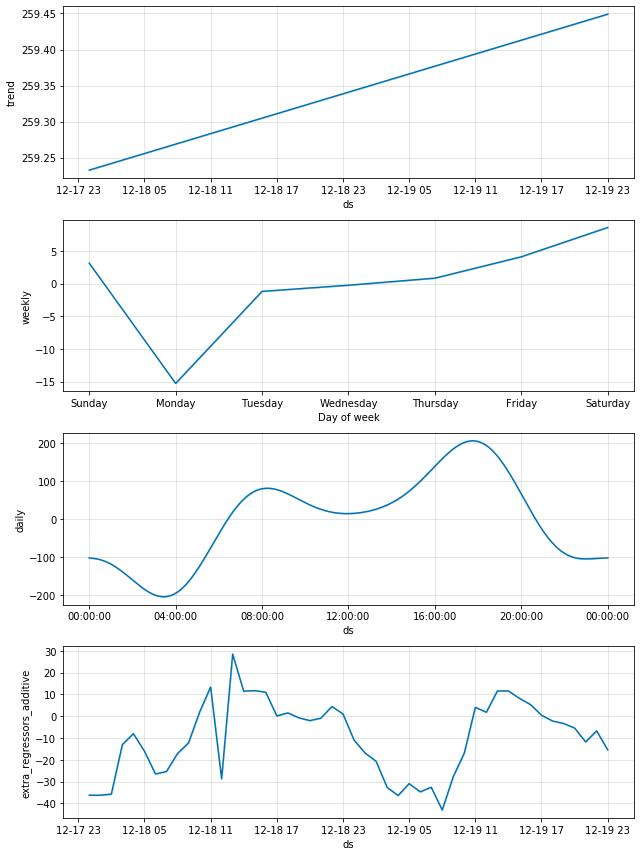

In [139]:
fig2 = m.plot_components(forecast)

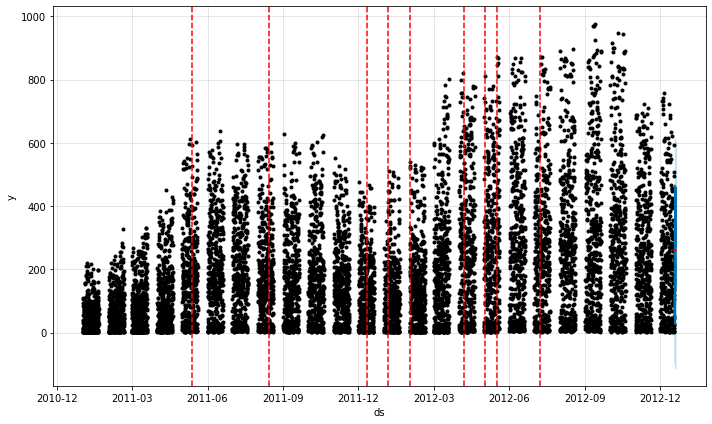

In [144]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)